In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup
ROOT = Path.cwd()
for _ in range(6):
    if (ROOT / 'data').exists():
        break
    ROOT = ROOT.parent

DATA_DIR = ROOT / 'data' / 'attendance'
REPORTS_DIR = ROOT / 'reports' / 'figures'
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("📊 Loading attendance data...\n")

# Load all attendance files except 2008/09
attendance_files = sorted(DATA_DIR.glob('attendance_*_ligat_haal_transfermarkt.csv'))
attendance_files = [f for f in attendance_files if '2008_09' not in str(f)]

print(f"📁 Found {len(attendance_files)} files to load:")
for f in attendance_files:
    print(f"   - {f.name}")

dfs = []
for file in attendance_files:
    df = pd.read_csv(file)
    # Remove duplicates within each file
    df = df.drop_duplicates(subset=['season', 'team'])
    dfs.append(df)
    print(f"  ✓ {file.name}: {len(df)} teams")

# Combine all data
df_attendance = pd.concat(dfs, ignore_index=True)

# Remove any duplicate rows across all combined data
df_attendance = df_attendance.drop_duplicates(subset=['season', 'team'])

df_attendance['season_year'] = df_attendance['season'].str.split('/').str[0].astype(int)

print(f"\n✅ Total records (after deduplication): {len(df_attendance)}")
print(f"   Seasons: {sorted(df_attendance['season'].unique())}")
print(f"   Teams: {df_attendance['team'].nunique()}")

# Verify teams per season
print("\n📊 Teams per season:")
teams_per_season = df_attendance.groupby('season').size()
for season, count in teams_per_season.items():
    print(f"   {season}: {count} teams")

# Display first rows
display(df_attendance.head(10))

print("\n" + "="*80)
print("📈 BASIC STATISTICS")
print("="*80)

# Overall stats
print(f"\nAverage attendance per team per season: {df_attendance['average_attendance'].mean():.0f}")
print(f"Median attendance per team per season: {df_attendance['average_attendance'].median():.0f}")
print(f"Max attendance: {df_attendance['average_attendance'].max():.0f}")
print(f"Min attendance: {df_attendance['average_attendance'].min():.0f}")

# By season
print("\n" + "-"*80)
print("📊 ATTENDANCE BY SEASON")
print("-"*80)

season_stats = df_attendance.groupby('season').agg({
    'average_attendance': ['mean', 'median', 'sum', 'count'],
    'total_spectators': 'sum'
}).round(0)

season_stats.columns = ['Avg Attendance', 'Median Attendance', 'Total Attendance', 'Teams', 'Total Spectators']
display(season_stats)

# Top 10 teams by average attendance
print("\n" + "-"*80)
print("🏆 TOP 10 TEAMS BY AVERAGE ATTENDANCE (ALL SEASONS)")
print("-"*80)

top_teams = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=False).head(10)
display(top_teams)

# Bottom 10 teams
print("\n" + "-"*80)
print("📉 BOTTOM 10 TEAMS BY AVERAGE ATTENDANCE")
print("-"*80)

bottom_teams = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=True).head(10)
display(bottom_teams)

# Most attended seasons
print("\n" + "-"*80)
print("🎯 MOST ATTENDED SEASONS")
print("-"*80)

season_totals = df_attendance.groupby('season')['total_spectators'].sum().sort_values(ascending=False)
display(season_totals)

📊 Loading attendance data...

  ✓ attendance_2006_07_ligat_haal_transfermarkt.csv: 12 teams
  ✓ attendance_2007_08_ligat_haal_transfermarkt.csv: 12 teams
  ✓ attendance_2009_10_ligat_haal_transfermarkt.csv: 16 teams
  ✓ attendance_2010_11_ligat_haal_transfermarkt.csv: 16 teams
  ✓ attendance_2011_12_ligat_haal_transfermarkt.csv: 16 teams
  ✓ attendance_2012_13_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2013_14_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2014_15_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2015_16_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2016_17_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2017_18_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2018_19_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2019_20_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2020_21_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2021_22_ligat_haal_transfermarkt.csv: 14 teams
  ✓ attendance_2022_23_ligat_haal_transf

,season,team,stadium,capacity,total_spectators,average_attendance,season_year
0,2006/07,Bnei Yehuda Tel Aviv,Unknown,6020,49000,3063,2006
1,2006/07,Hapoel Tel Aviv,Unknown,29150,16000,5333,2006
2,2006/07,Hapoel Petah Tikva,Unknown,11500,10250,2050,2006
3,2006/07,Beitar Jerusalem,Unknown,33500,10000,10000,2006
4,2006/07,Maccabi Netanya,Unknown,13610,9250,3083,2006
5,2006/07,Maccabi Haifa,Unknown,30780,7700,3850,2006
6,2006/07,Hakoah Amidar Ramat Gan,Unknown,8000,6250,1250,2006
7,2006/07,Hapoel Kfar Saba,Unknown,5800,4500,2250,2006
8,2006/07,FC Ashdod,Unknown,8200,2500,2500,2006
9,2006/07,Maccabi Petah Tikva,Unknown,11500,2000,2000,2006



📈 BASIC STATISTICS

Average attendance per team per season: 5887
Median attendance per team per season: 3484
Max attendance: 28639
Min attendance: 0

--------------------------------------------------------------------------------
📊 ATTENDANCE BY SEASON
--------------------------------------------------------------------------------


,Avg Attendance,Median Attendance,Total Attendance,Teams,Total Spectators
season,,,,,
2006/07,3136.0,2375.0,75258,24,239400
2007/08,5738.0,4198.0,137706,24,725200
2008/09,0.0,0.0,0,12,0
2009/10,3926.0,2816.0,125642,32,1878310
2010/11,4867.0,3334.0,155732,32,636900
2011/12,3891.0,2807.0,124504,32,1823560
2012/13,5038.0,3900.0,141068,28,1833880
2013/14,5444.0,3988.0,152436,28,1941562
2014/15,7630.0,6310.0,213646,28,1871874



--------------------------------------------------------------------------------
🏆 TOP 10 TEAMS BY AVERAGE ATTENDANCE (ALL SEASONS)
--------------------------------------------------------------------------------


team
Maccabi Haifa           15670.256410
Maccabi Tel Aviv        12635.230769
Beitar Jerusalem        10588.564103
Hapoel Beer Sheva        9657.764706
Hapoel Tel Aviv          9365.542857
Hapoel Haifa             5053.294118
Maccabi Netanya          4783.257143
Hapoel Jerusalem         3800.400000
Hapoel Petah Tikva       3431.600000
Bnei Yehuda Tel Aviv     3264.888889
Name: average_attendance, dtype: float64


--------------------------------------------------------------------------------
📉 BOTTOM 10 TEAMS BY AVERAGE ATTENDANCE
--------------------------------------------------------------------------------


team
Hakoah Amidar Ramat Gan     833.333333
Hapoel Ramat haSharon      1228.000000
Maccabi Ahi Nazareth       1237.000000
Maccabi Herzliya           1625.000000
Hapoel Nof HaGalil         1654.000000
Hapoel Ramat Gan           1701.333333
Hapoel Rishon leZion       1753.000000
Ironi Kiryat Shmona        1873.636364
Hapoel Raanana             1876.750000
Hapoel Acre                2117.875000
Name: average_attendance, dtype: float64


--------------------------------------------------------------------------------
🎯 MOST ATTENDED SEASONS
--------------------------------------------------------------------------------


season
2022/23    3066012
2019/20    2690818
2021/22    2627022
2015/16    2494994
2024/25    2490090
2018/19    2284562
2016/17    2278800
2023/24    2203144
2017/18    2158958
2013/14    1941562
2009/10    1878310
2014/15    1871874
2012/13    1833880
2011/12    1823560
2025/26    1236870
2007/08     725200
2010/11     636900
2006/07     239400
2020/21      49580
2008/09          0
Name: total_spectators, dtype: int64


📈 VISUALIZATIONS


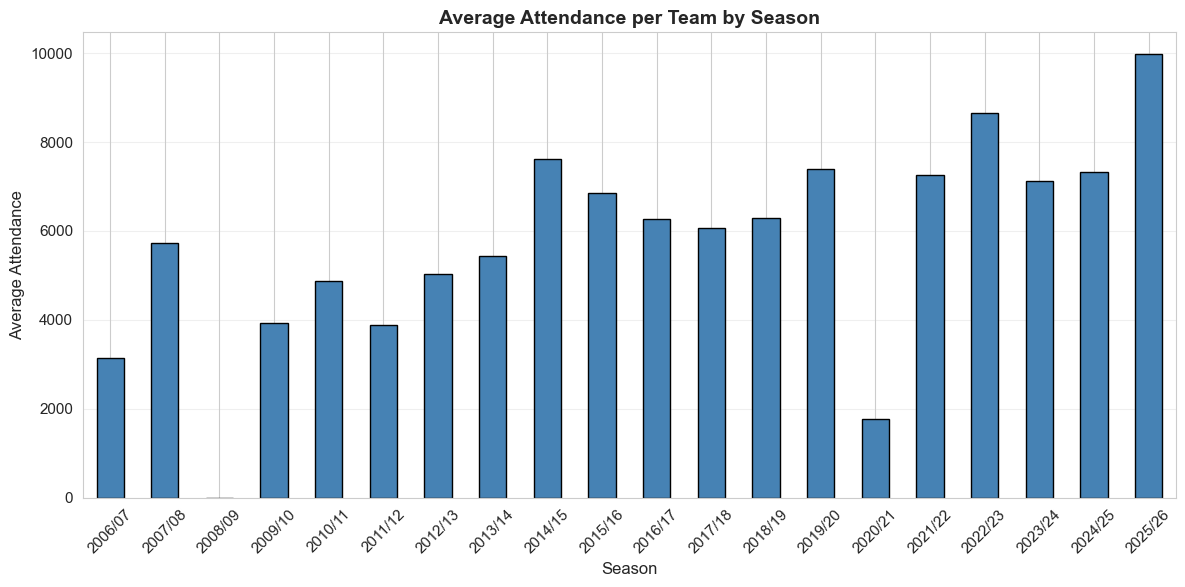

✓ Saved: attendance_by_season.png


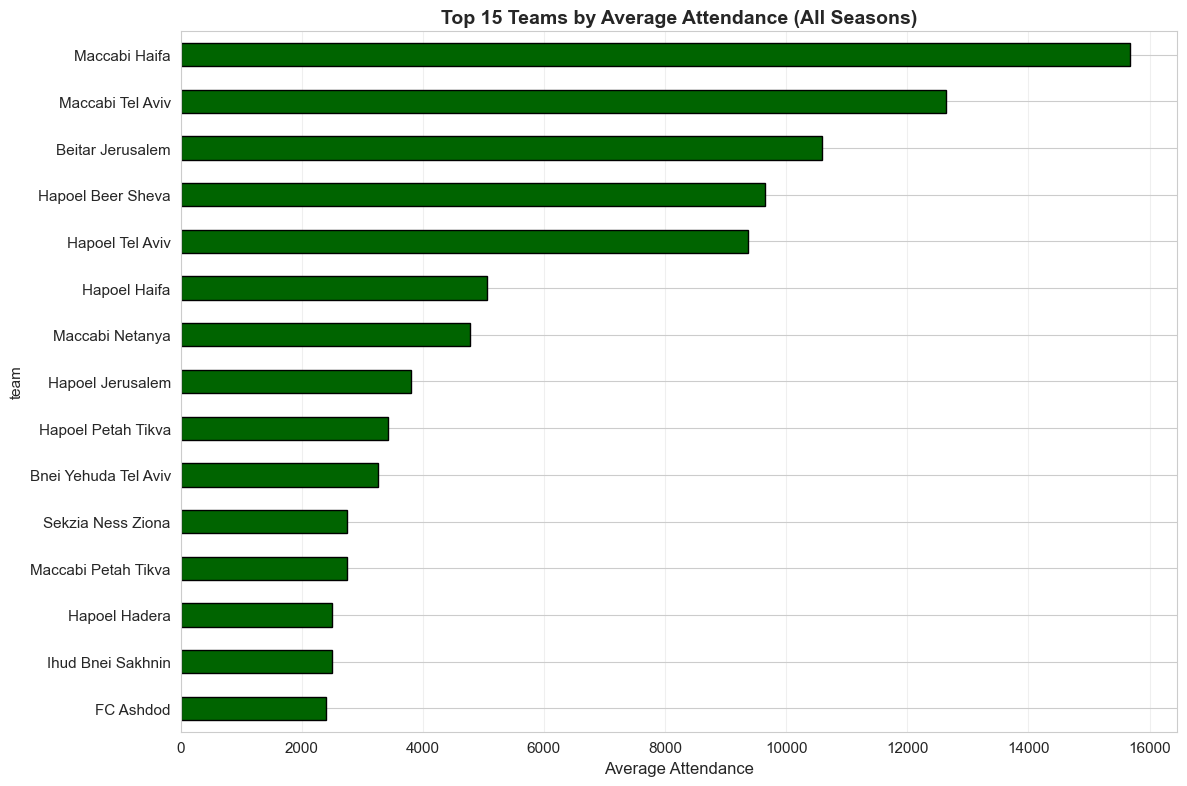

✓ Saved: top_teams_attendance.png


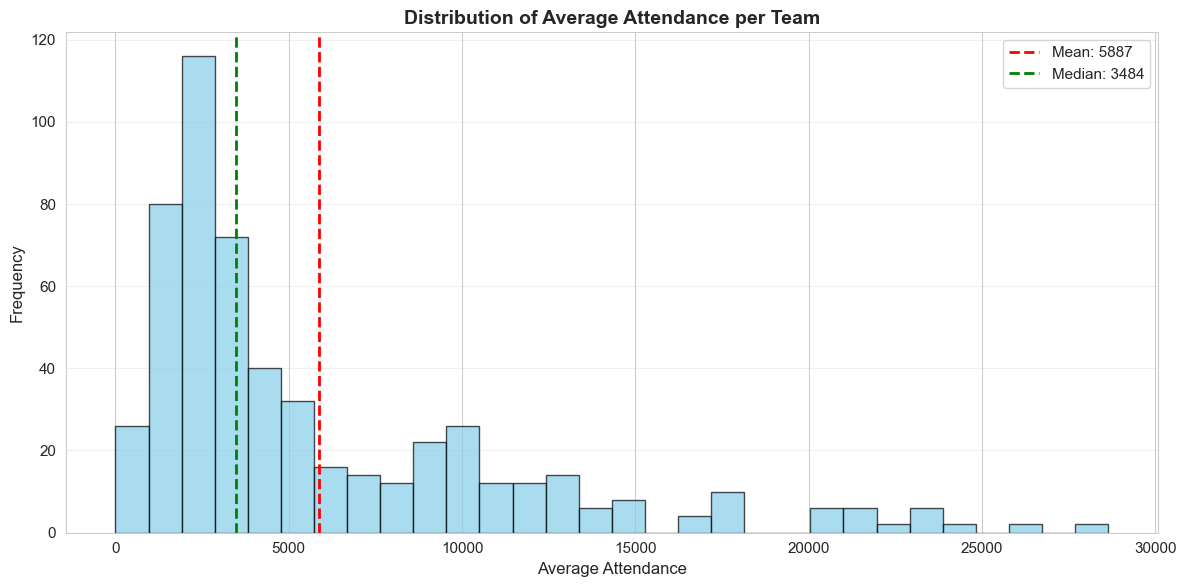

✓ Saved: attendance_distribution.png


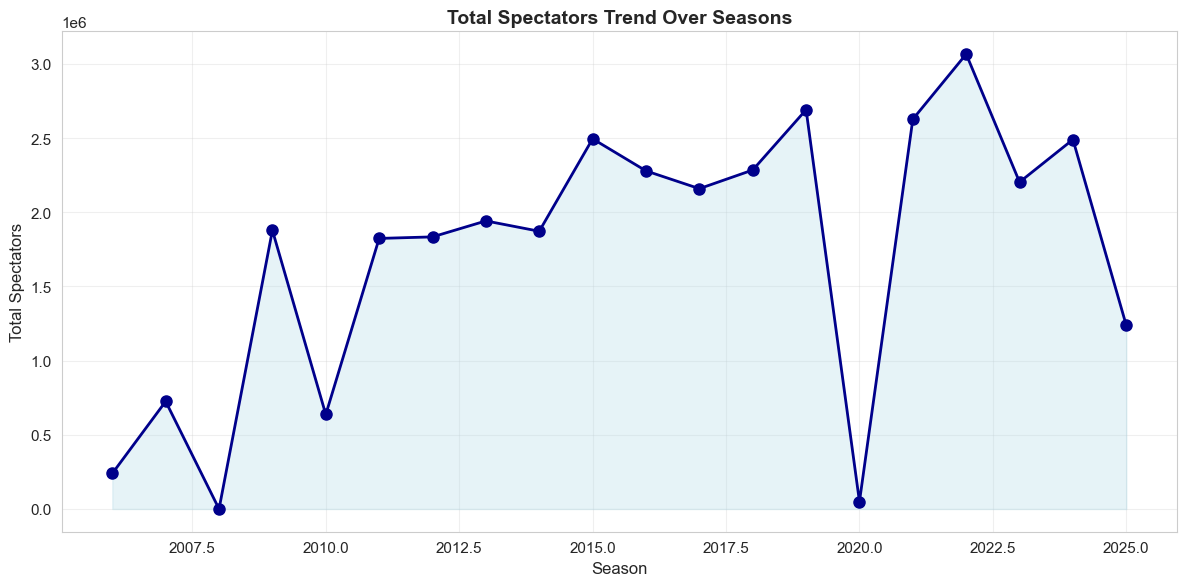

✓ Saved: spectators_trend.png


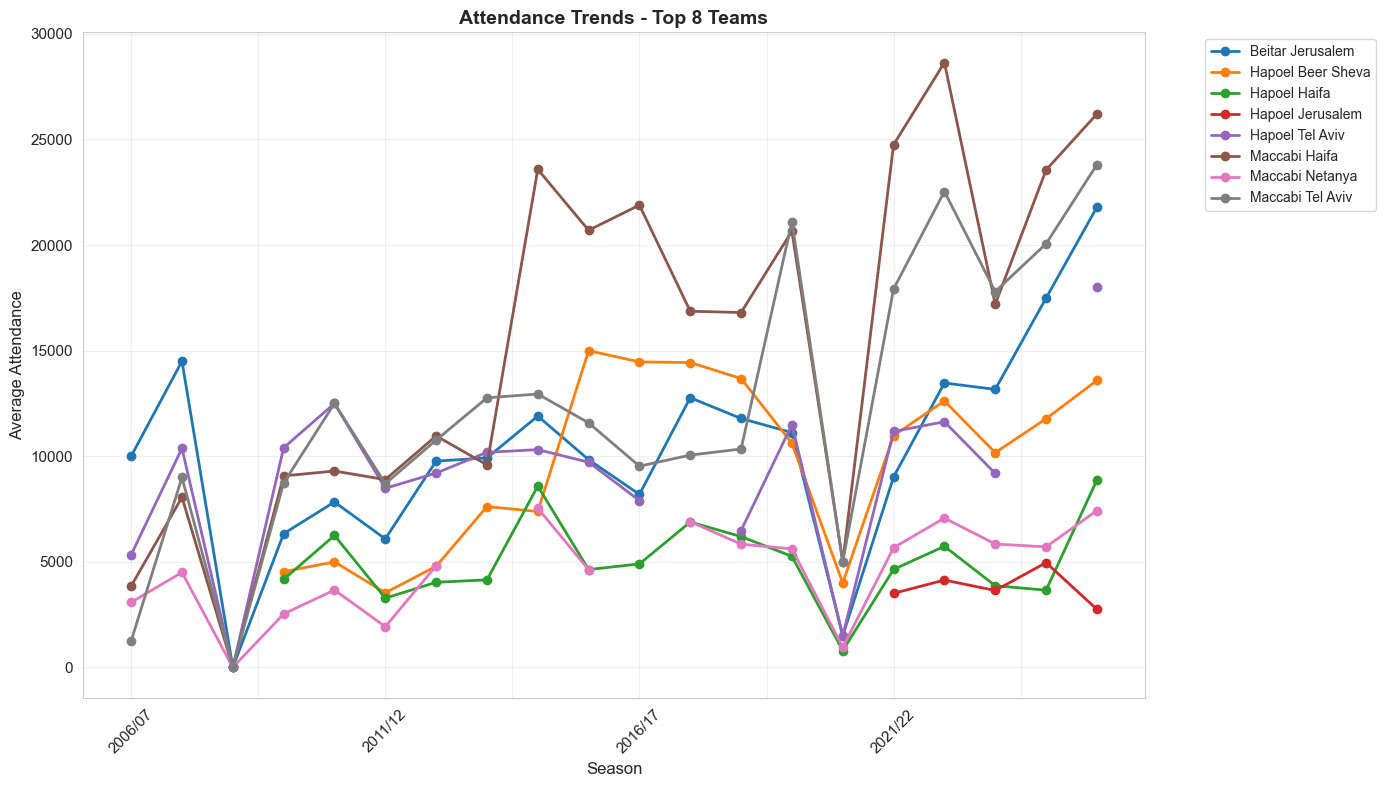

✓ Saved: top_teams_trends.png


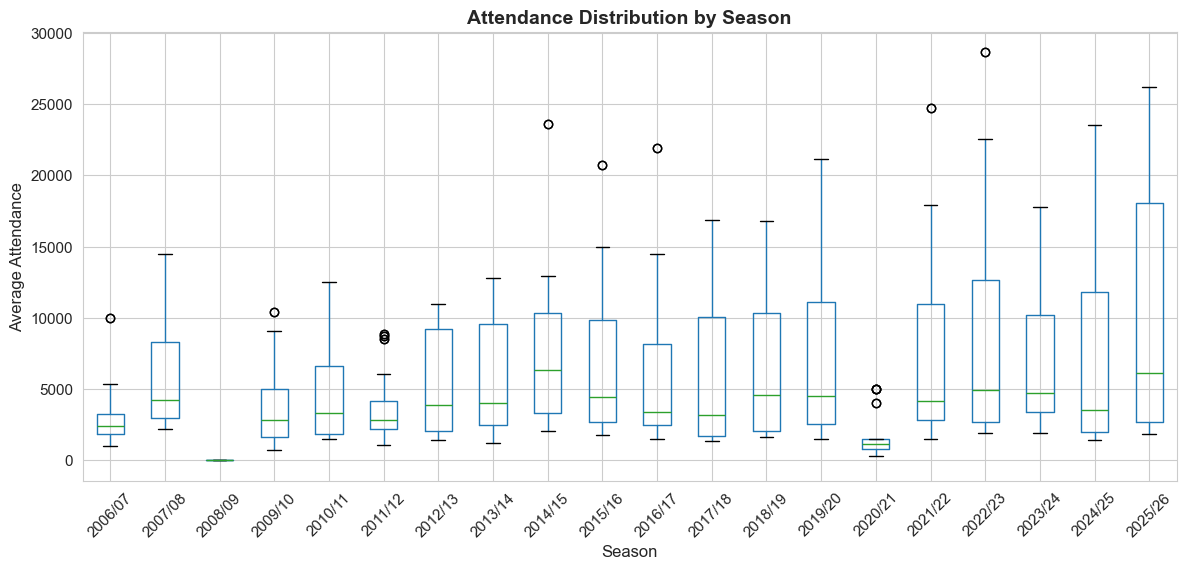

✓ Saved: attendance_boxplot.png


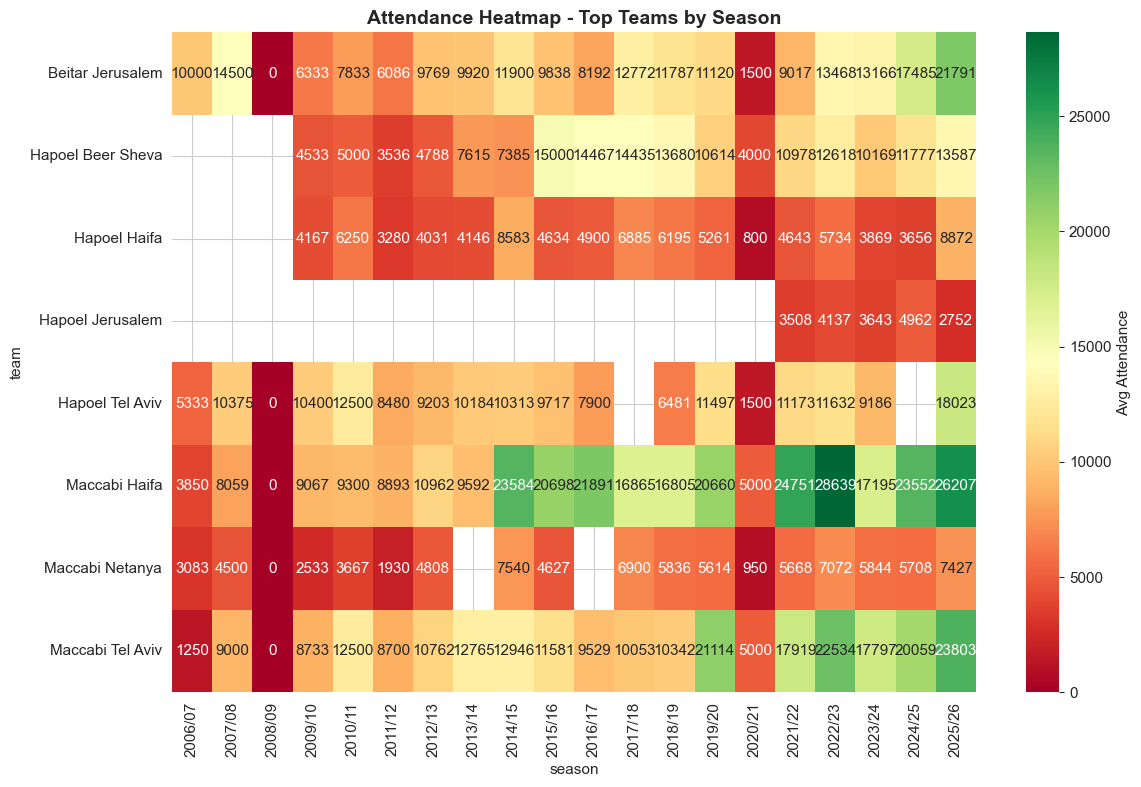

✓ Saved: attendance_heatmap.png

✅ All visualizations saved to: c:\Users\idant\Desktop\final project\ligat_haal_project\ligat_haal_project\notebooks\reports\figures


In [3]:
print("\n" + "="*80)
print("📈 VISUALIZATIONS")
print("="*80)

# 1. Average attendance by season
fig, ax = plt.subplots(figsize=(12, 6))
season_avg = df_attendance.groupby('season')['average_attendance'].mean()
season_avg.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Average Attendance per Team by Season', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_by_season.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_by_season.png")

# 2. Top 15 teams by average attendance
fig, ax = plt.subplots(figsize=(12, 8))
top_15 = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=True).tail(15)
top_15.plot(kind='barh', ax=ax, color='darkgreen', edgecolor='black')
ax.set_title('Top 15 Teams by Average Attendance (All Seasons)', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Attendance', fontsize=12)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'top_teams_attendance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: top_teams_attendance.png")

# 3. Distribution of attendance
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_attendance['average_attendance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(df_attendance['average_attendance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_attendance["average_attendance"].mean():.0f}')
ax.axvline(df_attendance['average_attendance'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_attendance["average_attendance"].median():.0f}')
ax.set_title('Distribution of Average Attendance per Team', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Attendance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_distribution.png")

# 4. Total spectators by season (trend)
fig, ax = plt.subplots(figsize=(12, 6))
season_totals = df_attendance.groupby('season_year')['total_spectators'].sum()
ax.plot(season_totals.index, season_totals.values, marker='o', linewidth=2, markersize=8, color='darkblue')
ax.fill_between(season_totals.index, season_totals.values, alpha=0.3, color='lightblue')
ax.set_title('Total Spectators Trend Over Seasons', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Total Spectators', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'spectators_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: spectators_trend.png")

# 5. Attendance by team across seasons (top teams)
fig, ax = plt.subplots(figsize=(14, 8))
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(8).index
pivot_data = df_attendance[df_attendance['team'].isin(top_teams_list)].pivot_table(
    values='average_attendance', 
    index='season', 
    columns='team', 
    aggfunc='mean'
)
pivot_data.plot(ax=ax, marker='o', linewidth=2)
ax.set_title('Attendance Trends - Top 8 Teams', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'top_teams_trends.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: top_teams_trends.png")

# 6. Box plot - attendance by season
fig, ax = plt.subplots(figsize=(12, 6))
df_attendance.boxplot(column='average_attendance', by='season', ax=ax)
ax.set_title('Attendance Distribution by Season', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_boxplot.png")

# 7. Heatmap - top teams attendance by season
fig, ax = plt.subplots(figsize=(12, 8))
heatmap_data = df_attendance[df_attendance['team'].isin(top_teams_list)].pivot_table(
    values='average_attendance',
    index='team',
    columns='season'
)
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlGn', ax=ax, cbar_kws={'label': 'Avg Attendance'})
ax.set_title('Attendance Heatmap - Top Teams by Season', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_heatmap.png")

print("\n✅ All visualizations saved to: " + str(REPORTS_DIR))

In [4]:
print("\n" + "="*80)
print("🔍 DETAILED ANALYSIS")
print("="*80)

# Growth/decline analysis
print("\n📊 SEASON-TO-SEASON GROWTH")
print("-"*80)

season_avg_yearly = df_attendance.groupby('season_year')['average_attendance'].mean()
growth = season_avg_yearly.pct_change() * 100

for year, pct in growth.items():
    if pd.notna(pct):
        direction = "📈" if pct > 0 else "📉"
        print(f"  {year-1}/{year%100:02d} → {year}/{year+1%100:02d}: {direction} {pct:+.1f}%")

# Teams with highest growth
print("\n🚀 TEAMS WITH HIGHEST AVERAGE ATTENDANCE")
print("-"*80)

team_avg = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=False)
for i, (team, avg) in enumerate(team_avg.head(5).items(), 1):
    print(f"  {i}. {team}: {avg:.0f}")

# Consistency analysis
print("\n📈 MOST CONSISTENT ATTENDANCE (Low variance)")
print("-"*80)

team_std = df_attendance.groupby('team')['average_attendance'].std().sort_values()
for i, (team, std) in enumerate(team_std.head(5).items(), 1):
    print(f"  {i}. {team}: σ = {std:.0f}")

# Most variable
print("\n📊 MOST VARIABLE ATTENDANCE (High variance)")
print("-"*80)

for i, (team, std) in enumerate(team_std.tail(5).sort_values(ascending=False).items(), 1):
    print(f"  {i}. {team}: σ = {std:.0f}")

print("\n" + "="*80)


🔍 DETAILED ANALYSIS

📊 SEASON-TO-SEASON GROWTH
--------------------------------------------------------------------------------
  2006/07 → 2007/2008: 📈 +83.0%
  2007/08 → 2008/2009: 📉 -100.0%
  2008/09 → 2009/2010: 📈 +inf%
  2009/10 → 2010/2011: 📈 +23.9%
  2010/11 → 2011/2012: 📉 -20.1%
  2011/12 → 2012/2013: 📈 +29.5%
  2012/13 → 2013/2014: 📈 +8.1%
  2013/14 → 2014/2015: 📈 +40.2%
  2014/15 → 2015/2016: 📉 -10.2%
  2015/16 → 2016/2017: 📉 -8.7%
  2016/17 → 2017/2018: 📉 -3.0%
  2017/18 → 2018/2019: 📈 +3.7%
  2018/19 → 2019/2020: 📈 +17.4%
  2019/20 → 2020/2021: 📉 -76.0%
  2020/21 → 2021/2022: 📈 +310.4%
  2021/22 → 2022/2023: 📈 +19.1%
  2022/23 → 2023/2024: 📉 -17.7%
  2023/24 → 2024/2025: 📈 +3.0%
  2024/25 → 2025/2026: 📈 +35.9%

🚀 TEAMS WITH HIGHEST AVERAGE ATTENDANCE
--------------------------------------------------------------------------------
  1. Maccabi Haifa: 15670
  2. Maccabi Tel Aviv: 12635
  3. Beitar Jerusalem: 10589
  4. Hapoel Beer Sheva: 9658
  5. Hapoel Tel Aviv: 9366

📈 MO